# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from scipy import stats

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [4]:
cities

['east london',
 'jamestown',
 'constitucion',
 'pangnirtung',
 'butaritari',
 'escanaba',
 'busselton',
 'sao filipe',
 'mataura',
 'nianzishan',
 'borovoy',
 'saint-philippe',
 'dwarka',
 'punta arenas',
 'faanui',
 'geraldton',
 'hilo',
 'namibe',
 'rikitea',
 'narsaq',
 'fort nelson',
 'atuona',
 'sidi ali',
 'kushiro',
 'amderma',
 'tuatapere',
 'victoria',
 'port alfred',
 'avera',
 'avarua',
 'new norfolk',
 'polyarnyy',
 'bonthe',
 'barrow',
 'puerto ayora',
 'salalah',
 'antofagasta',
 'alcaniz',
 'ndele',
 'saskylakh',
 'tasiilaq',
 'mar del plata',
 'kuruman',
 'saldanha',
 'vaitupu',
 'lichuan',
 'ushuaia',
 'maniitsoq',
 'lagoa',
 'ambilobe',
 'jaisinghnagar',
 'hermanus',
 'kenai',
 'zhemchuzhnyy',
 'galiwinku',
 'kuche',
 'bambous virieux',
 'kapaa',
 'georgetown',
 'la ronge',
 'qaanaaq',
 'arman',
 'washougal',
 'scottsburgh',
 'marawi',
 'negele',
 'dikson',
 'nizhneyansk',
 'anadyr',
 'beringovskiy',
 'jiaohe',
 'ribeira grande',
 'bethel',
 'upernavik',
 'lamar',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Set lists
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Counters
record_counter = 1
set_counter = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities
for city in cities:
    
    # Conditional for record_counter
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
    
    # Try request and Append lists
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
        
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except:
        print(f"City not found. Skipping...")
        pass
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | constitucion
Processing Record 5 of Set 1 | pangnirtung
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | escanaba
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | nianzishan
Processing Record 12 of Set 1 | borovoy
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | dwarka
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | narsaq
Processing Record 22 of Set 1 | fort nelson
Processing Record 23 of Set 1 | atuona
Processing Record 24 of Set 1 | sidi

Processing Record 33 of Set 4 | kamenka
Processing Record 34 of Set 4 | phan thiet
Processing Record 35 of Set 4 | graaff-reinet
Processing Record 36 of Set 4 | sibenik
Processing Record 37 of Set 4 | ewa beach
Processing Record 38 of Set 4 | yuryevets
Processing Record 39 of Set 4 | luderitz
Processing Record 40 of Set 4 | leningradskiy
Processing Record 41 of Set 4 | acari
Processing Record 42 of Set 4 | newark
Processing Record 43 of Set 4 | cherskiy
Processing Record 44 of Set 4 | banda aceh
Processing Record 45 of Set 4 | kodiak
Processing Record 46 of Set 4 | khonuu
City not found. Skipping...
Processing Record 47 of Set 4 | gloversville
Processing Record 48 of Set 4 | bengkulu
Processing Record 49 of Set 4 | buariki
City not found. Skipping...
Processing Record 50 of Set 4 | kuusamo
Processing Record 0 of Set 5 | strezhevoy
Processing Record 1 of Set 5 | jumla
Processing Record 2 of Set 5 | sovetsk
Processing Record 3 of Set 5 | halalo
City not found. Skipping...
Processing Reco

Processing Record 21 of Set 8 | puerto del rosario
Processing Record 22 of Set 8 | mitchell
Processing Record 23 of Set 8 | korla
Processing Record 24 of Set 8 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 25 of Set 8 | meyungs
City not found. Skipping...
Processing Record 26 of Set 8 | hearst
Processing Record 27 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 28 of Set 8 | harper
Processing Record 29 of Set 8 | abnub
Processing Record 30 of Set 8 | burica
City not found. Skipping...
Processing Record 31 of Set 8 | dillon
Processing Record 32 of Set 8 | poum
Processing Record 33 of Set 8 | mporokoso
Processing Record 34 of Set 8 | eldorado
Processing Record 35 of Set 8 | coahuayana
Processing Record 36 of Set 8 | molepolole
Processing Record 37 of Set 8 | cozumel
Processing Record 38 of Set 8 | kondinskoye
Processing Record 39 of Set 8 | bundaberg
Processing Record 40 of Set 8 | otse
Processing Record 41 of Set 8 | alugan
Processing Record 42 of 

Processing Record 2 of Set 12 | half moon bay
Processing Record 3 of Set 12 | svay rieng
Processing Record 4 of Set 12 | tapes
Processing Record 5 of Set 12 | baghdad
Processing Record 6 of Set 12 | aklavik
Processing Record 7 of Set 12 | wanning
Processing Record 8 of Set 12 | hay river
Processing Record 9 of Set 12 | buluang
Processing Record 10 of Set 12 | qingdao
Processing Record 11 of Set 12 | dalvik
Processing Record 12 of Set 12 | beni
Processing Record 13 of Set 12 | garden city
Processing Record 14 of Set 12 | taburi
City not found. Skipping...
Processing Record 15 of Set 12 | jawhar
Processing Record 16 of Set 12 | cockburn town
Processing Record 17 of Set 12 | kavieng
Processing Record 18 of Set 12 | chippewa falls
Processing Record 19 of Set 12 | bardiyah
Processing Record 20 of Set 12 | asind
Processing Record 21 of Set 12 | ola
Processing Record 22 of Set 12 | romitan
Processing Record 23 of Set 12 | palmer
Processing Record 24 of Set 12 | stromness
Processing Record 25 

In [10]:
pprint(requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q=atar").json())

{'base': 'stations',
 'clouds': {'all': 66},
 'cod': 200,
 'coord': {'lat': 20.52, 'lon': -13.05},
 'dt': 1603465090,
 'id': 2381334,
 'main': {'feels_like': 90.88,
          'grnd_level': 988,
          'humidity': 11,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 97.5,
          'temp_max': 97.5,
          'temp_min': 97.5},
 'name': 'Atar',
 'sys': {'country': 'MR', 'sunrise': 1603435817, 'sunset': 1603477342},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 77, 'speed': 5.99}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create a Weather DataFrame
weather_df = pd.DataFrame({
     "City": city_name,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Humidity": humidity,
     "Cloudiness": cloudiness,
     "Wind Speed": wind_speed,
     "Country": country,
     "Date": date})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.02,27.91,71.60,88,96,9.17,ZA,1603465033
1,Jamestown,42.10,-79.24,66.00,82,1,8.05,US,1603464793
2,Constitución,-35.33,-72.42,60.35,61,0,10.00,CL,1603465034
3,Pangnirtung,66.15,-65.71,26.60,92,90,3.36,CA,1603465034
4,Butaritari,3.07,172.79,82.33,70,87,12.41,KI,1603465034
...,...,...,...,...,...,...,...,...,...
548,Dubovka,49.06,44.83,59.00,67,0,13.42,RU,1603465146
549,Staraya Poltavka,50.48,46.48,54.79,76,98,6.91,RU,1603465146
550,Salinas,36.68,-121.66,59.00,82,90,4.70,US,1603464990
551,Igarka,67.47,86.58,7.75,95,95,7.23,RU,1603465147


In [11]:
# Export data to a CSV file
weather_df.to_csv("output_data/weather.csv",
                  encoding="utf-8", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

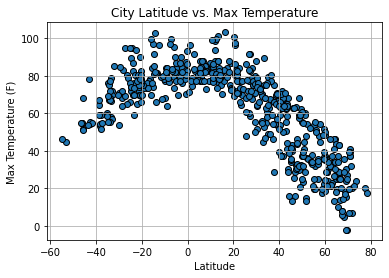

In [14]:
# Create a scatter plot for Lat vs Max Temp
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", edgecolor="black")

# Set Title and Labels
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatvsTemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

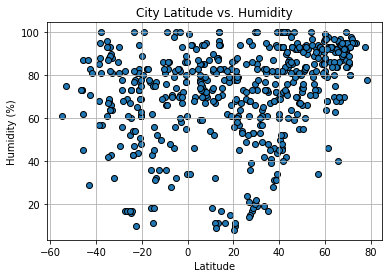

In [15]:
# Create a scatter plot for Lat vs Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolor = "black")

# Set Title and Labels
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatvsHumidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

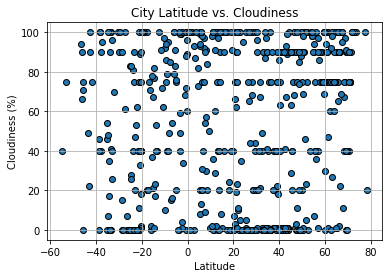

In [16]:
# Create a scatter plot for Lat vs Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolor = "black")

# Set Title and Labels
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatvsCloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

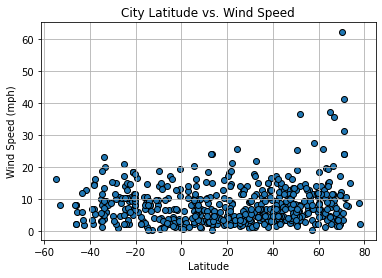

In [17]:
# Creat a scatter plot for Lat vs Wind Speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", edgecolor = "black")

# Set Title and Labels
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatvsWindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [21]:
def LinearRegressionplot(x_values, y_values):

# Perform a linear regression on Max Temp vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-" )

# Set Title and Labels
    plt.xlabel('Latitude')
    plt.ylabel(str(y_values.name))
    plt.annotate(line_eq,(0,0), fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere = weather_df.loc[weather_df["Lat"] > 0]
Sorthern_Hemisphere = weather_df.loc[weather_df["Lat"] < 0]

The r-squared is: -0.866735912706267


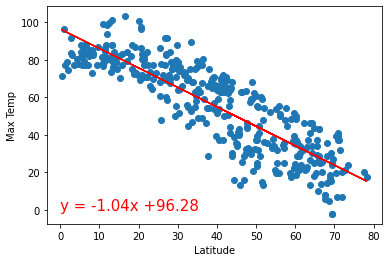

In [28]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6725217965790571


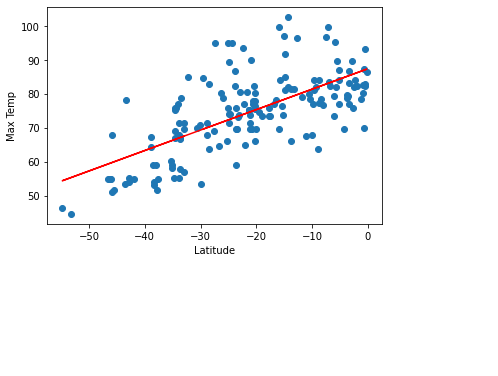

In [29]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3219898436737518


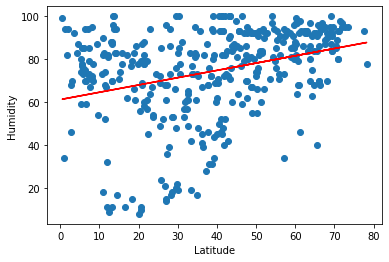

In [30]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.02688094315432565


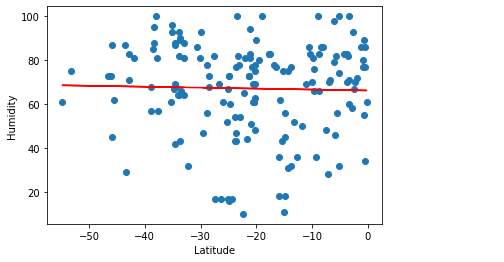

In [31]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15192687853197698


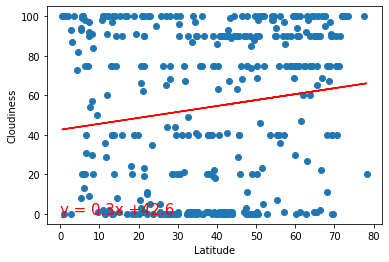

In [32]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06394198352489076


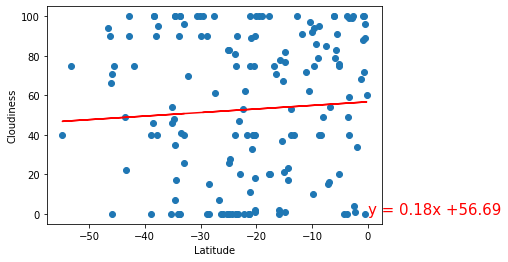

In [33]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20037885537378708


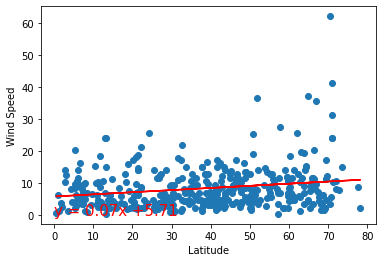

In [34]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1311356266731986


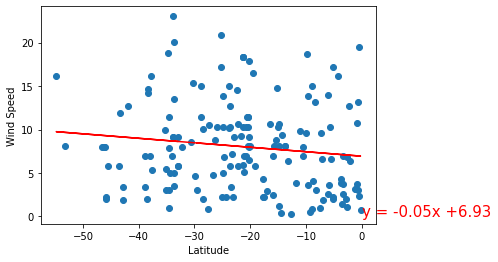

In [35]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)